# Accessing Sentinel-1 Data from the Planetary Computer catalogs

This code is based on the Documentation of the Microsoft ***Planetary Computer*** platform:

[Reading Data from the STAC API](https://planetarycomputer.microsoft.com/docs/quickstarts/reading-stac/)

The Sentinel 1 Level-1 Ground Range Detected (GRD) Data is taken from the platform [Planetary Computer](https://planetarycomputer.microsoft.com/explore)

In [1]:
import matplotlib.pyplot as plt
import pystac
import planetary_computer
import rioxarray
import xarray as xr
import numpy as np
import rasterio
from rasterio.merge import merge

In [2]:
%matplotlib inline

In [3]:
import sys
import importlib
sys.path.append('../../modules')
from plotting import raster_plotting
importlib.reload(raster_plotting);

## Accessing an individual item's data assets.

In [7]:
item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/sentinel-1-grd/items/S1C_IW_GRDH_1SDV_20250922T232209_20250922T232234_004244_0086B0"
# item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/sentinel-1-grd/items/S1C_IW_GRDH_1SDV_20250922T232144_20250922T232209_004244_0086B0"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)

signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'vv')
asset_href = signed_item.assets["vh"].href
ds = rioxarray.open_rasterio(asset_href)
ds;

In [8]:
ds_reprojected = ds.rio.reproject("EPSG:4326")

In [ ]:
# # save to GeoTIFF (compatible with GIS software)
# ds_reprojected.rio.to_raster('../../data/SAR/sentinel-1_GRD_VH_1.tif')
# print("SAR saved as sentinel-1_GRD_VH_1.tif")

SAR saved as sentinel-1_GRD_VH_1.tif


In [10]:
sampling = 10
SAR = ds_reprojected.isel(
    x=slice(None, None, sampling),
    y=slice(None, None, sampling)
)
SAR;

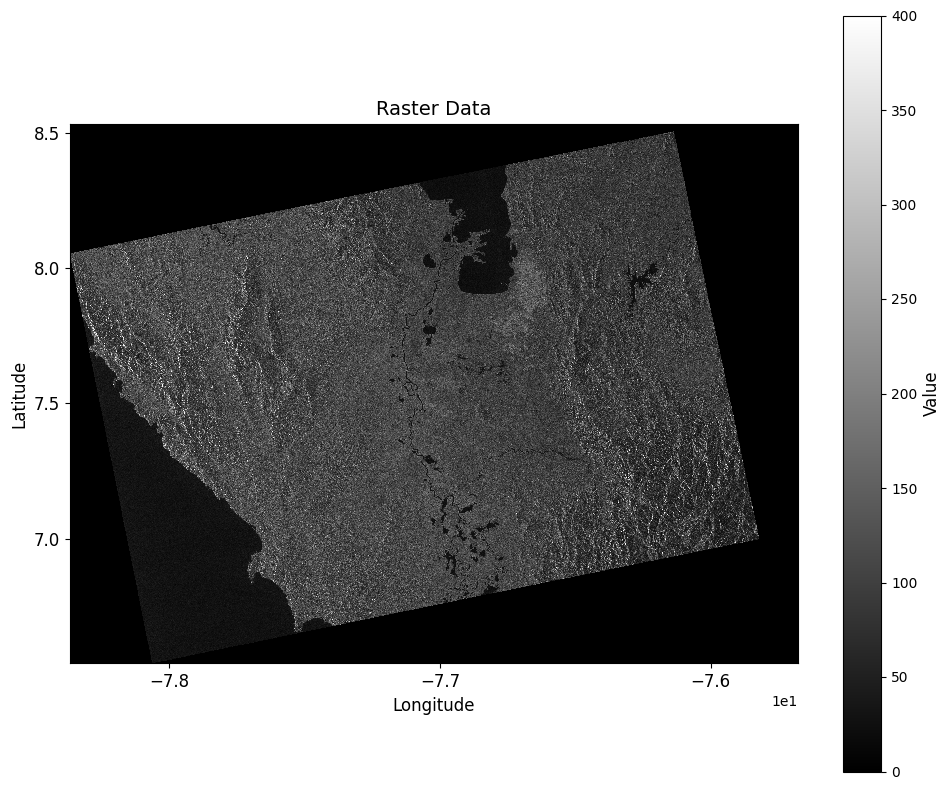

In [11]:
raster_plotting.plot_raster_data(SAR.x, SAR.y, SAR[0], vmax=400)

## Reading Saved Sentinel-1 Data

In [12]:
filename = '../../data/SAR/sentinel-1_GRD_VH_1.tif' # DTM taken from planetarycomputer.microsoft.com
SAR = rioxarray.open_rasterio(filename)
SAR;

In [13]:
sampling = 10
SAR_sampled = SAR.isel(
    x=slice(None, None, sampling),
    y=slice(None, None, sampling)
)
SAR_sampled;

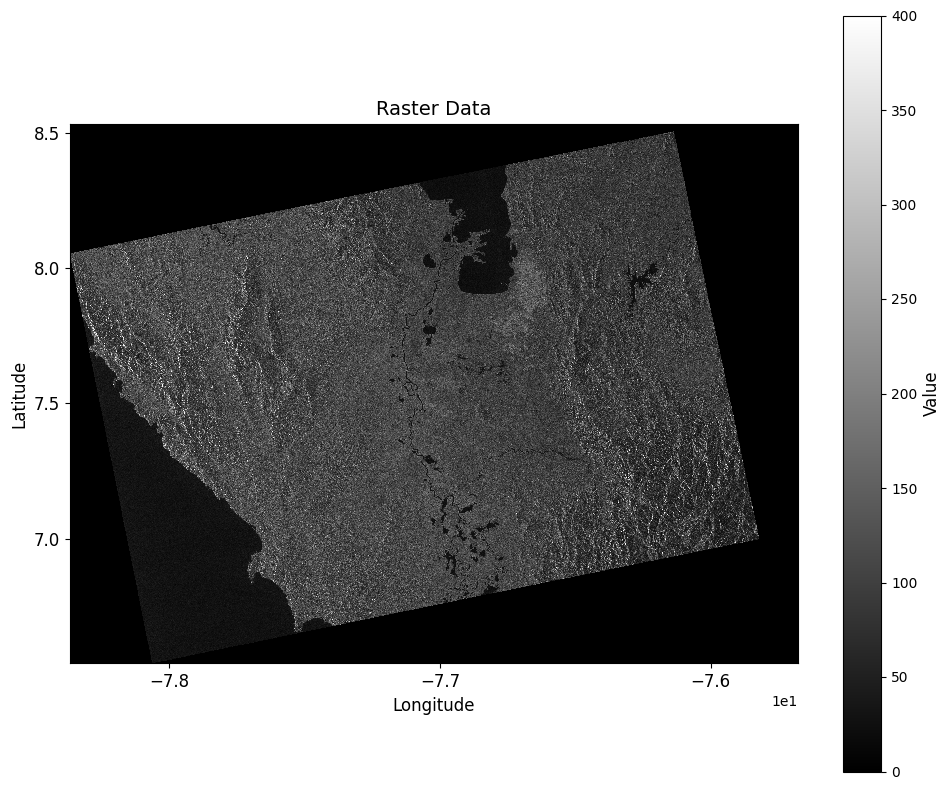

In [14]:
raster_plotting.plot_raster_data(SAR_sampled.x, SAR_sampled.y, SAR_sampled[0], vmax=400)

In [ ]:
# # save to GeoTIFF (compatible with GIS software)
# SAR_sampled.rio.to_raster('../../data/SAR/sentinel-1_GRD_VH_1_sub.tif')
# print("SAR saved as sentinel-1_GRD_VH_1_sub.tif")

## Combining two individual datasets

In [15]:
# Paths to the GeoTIFF files to be mosaicked
tiff1 = '../../data/SAR/sentinel-1_GRD_VH_1.tif'
tiff2 = '../../data/SAR/sentinel-1_GRD_VH_2.tif'

# Open the files as rasterio objects
src_files_to_mosaic = []
for path in [tiff1, tiff2]:
    src = rasterio.open(path)
    src_files_to_mosaic.append(src)

In [16]:
# Mosaic the rasters
mosaic, out_trans = merge(src_files_to_mosaic)

# Copy metadata from the first raster
out_meta = src.meta.copy()
out_meta.update({
    "driver": "GTiff",
    "height": mosaic.shape[1],
    "width": mosaic.shape[2],
    "transform": out_trans
})


In [ ]:
# with rasterio.open("../../data/SAR/sentinel-1_GRD_VH.tif", "w", **out_meta) as dest:
#     dest.write(mosaic)

## Reading Combined Dataset

In [4]:
filename = '../../data/SAR/sentinel-1_GRD_VH.tif' # DTM taken from planetarycomputer.microsoft.com
SAR = rioxarray.open_rasterio(filename)
SAR;

In [5]:
sampling = 10
SAR_sampled = SAR.isel(
    x=slice(None, None, sampling),
    y=slice(None, None, sampling)
)
SAR_sampled;

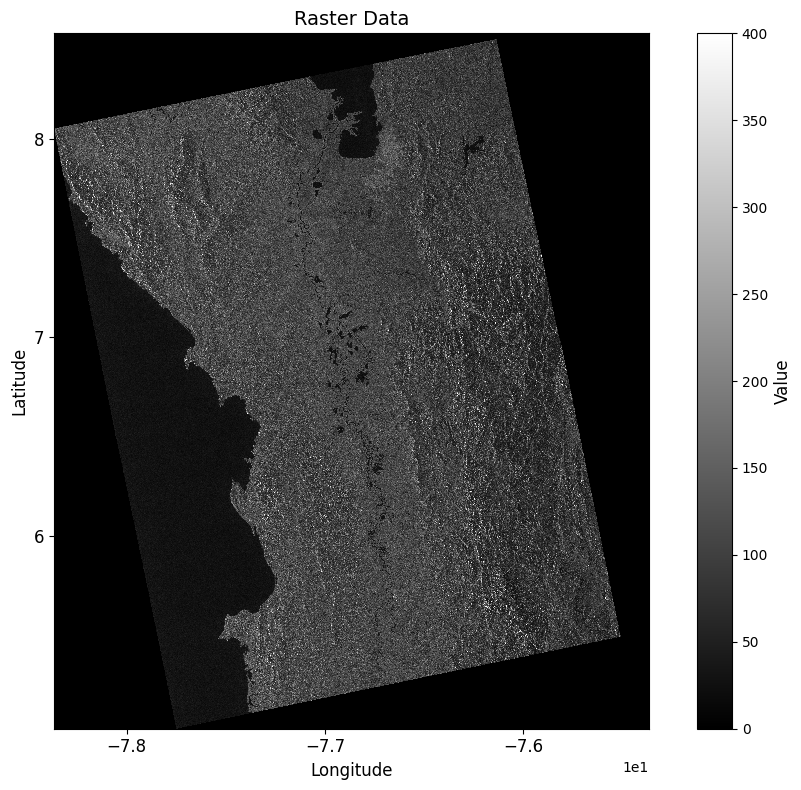

In [6]:
raster_plotting.plot_raster_data(SAR_sampled.x, SAR_sampled.y, SAR_sampled[0], vmax=400)

In [22]:
# save to GeoTIFF (compatible with GIS software)
# SAR_sampled.rio.to_raster('../../data/SAR/sentinel-1_GRD_VH_sub.tif')
# print("SAR saved as sentinel-1_GRD_VH_sub.tif")